<img src="https://cekumagroup.cas.lehigh.edu/sites/cekumagroup.cas2.lehigh.edu/files/image10.jpg "/>

# About the dataset 
### The dataset contains 20640 enteries and the 10 variables:
* Longitude	
* Latitude	
* Housing median age	
* Total rooms	
* Total bedrooms	
* Population	
* Households	
* Median income	
* Ocean proximity	
* Median house value 

### Purpose
* Predict the relation between the median house values in Californian districts, given the many features of the districts


In [1]:
#Import needed libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
#Other libraries that might be needed
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet # I have left other lib here for my future use
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,mean_absolute_percentage_error
from math import sqrt
from sklearn.model_selection import train_test_split
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
#Import the data
#cali_housing_data = pd.read_excel('Project1_housing.xlsx',index_col = 0)
cali_housing_data = pd.read_excel('Project1_housing.xlsx')

In [3]:
cali_housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income ocean_proximity  median_house_value  
0         322         126         8.3252        NEAR BAY              452600  
1        2401        1138         8.3014        NEAR BAY              358500  
2         496         177         7.2574        NEAR BAY              352100  
3         558         219         5.6431        NEAR BAY              341300  
4         565         259         3.8462        NEAR BAY              342200

In [4]:
cali_housing_data.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [5]:
cali_housing_data.shape

(20640, 10)

In [6]:
#Check the column names
cali_housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [7]:
#Let us handle the missing numbers, i.e., NaN
'''
First, we find their instances
Then, we fill it with the mean value of the column
'''

'\nFirst, we find their instances\nThen, we fill it with the mean value of the column\n'

In [8]:
cali_housing_data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [9]:
#Column total_bedrooms has 207 missing numbers. We fill it with the mean and check again
cali_housing_data.total_bedrooms=cali_housing_data.total_bedrooms.fillna(cali_housing_data.total_bedrooms.mean())
cali_housing_data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [10]:
#Next, we convert the categorical data to numerical data. 
'''
Looking at the whole data, ocean_proximity is a categorical data
'''
cali_housing_data['ocean_proximity']=LabelEncoder().fit_transform(cali_housing_data['ocean_proximity'])

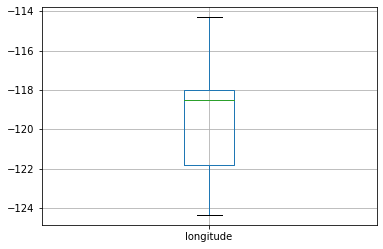

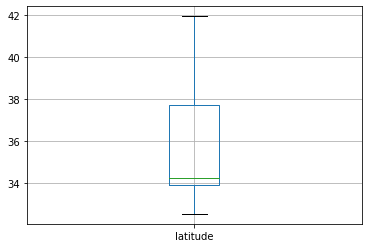

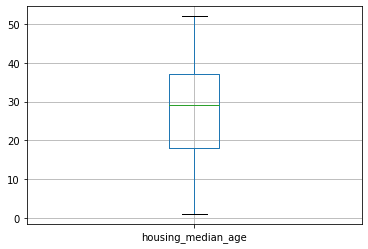

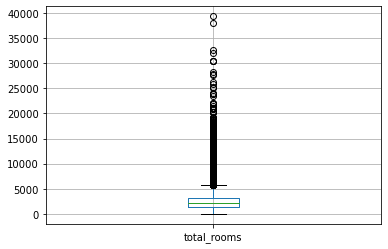

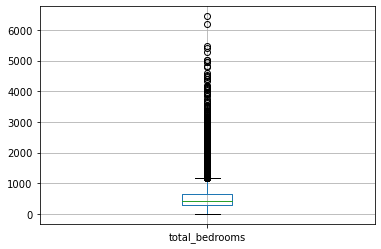

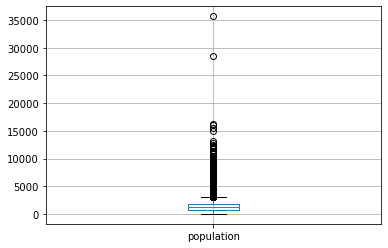

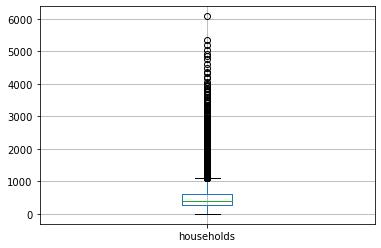

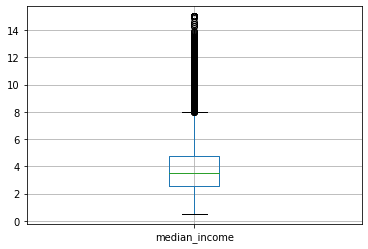

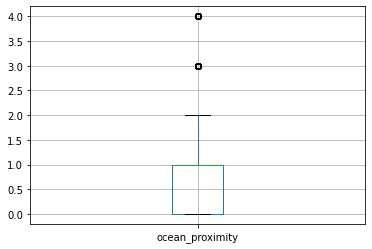

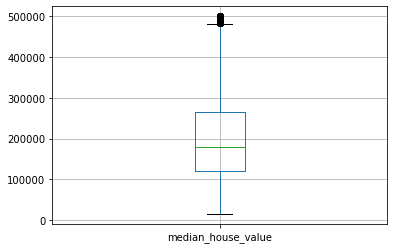

In [11]:
# Check for outliers and remove them from the analysis
for column in cali_housing_data: #We can now visualize the outliers and hand them. This will be later
    plt.figure()
    cali_housing_data.boxplot([column])

In [12]:
#Drop some irrelevant data
#cali_housing_data = cali_housing_data.drop(['longitude','latitude'],axis=1)
#del df_scaled_housing_data['longitude']
#del df_scaled_housing_data['latitude']

In [13]:
# Remove the outliers 
for x in ['longitude', 'latitude', 'housing_median_age', 
          'total_rooms', 'total_bedrooms', 'population', 'households', 
          'median_income', 'ocean_proximity', 'median_house_value']: #.columns: #['age', 'sex', 'bmi', 'bp','s1','s2','s3','s4','s5','s6','target']:
    q75,q25 = np.percentile(cali_housing_data.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

# Replace the outliers with zeros to enable analysis later.
    cali_housing_data.loc[cali_housing_data[x] < min,x] = 0
    cali_housing_data.loc[cali_housing_data[x] > max,x] = 0

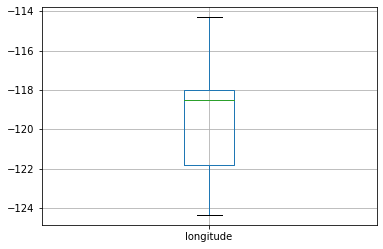

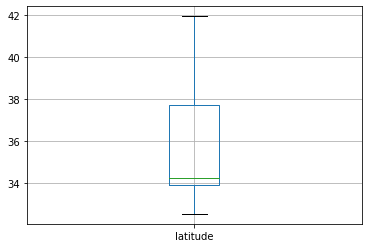

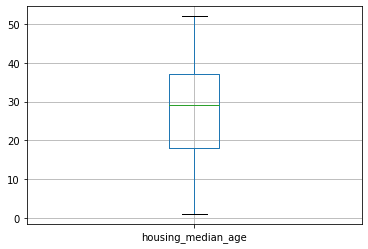

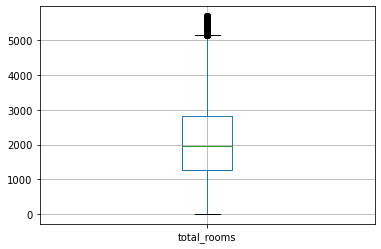

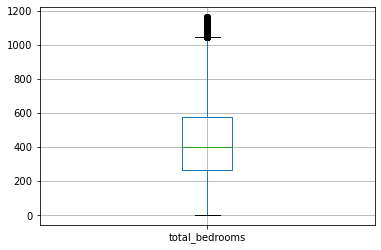

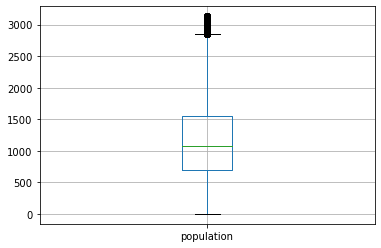

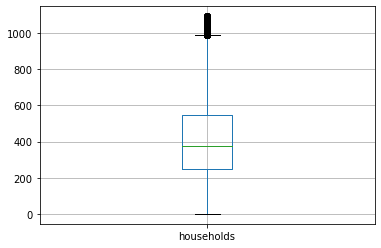

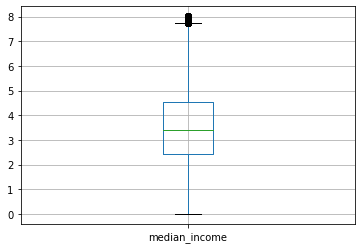

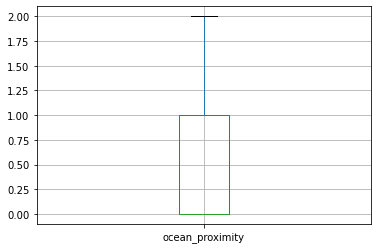

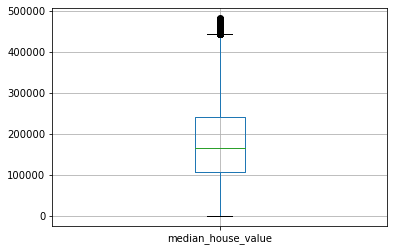

In [14]:
# Make sure the outliers are properly removed
for column in cali_housing_data:
    plt.figure()
    cali_housing_data.boxplot([column])

In [15]:
#Check again to make sure it has been converted properly.
cali_housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21            0          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  median_house_value  
0         322         126         0.0000                0              452600  
1        2401           0         0.0000                0              358500  
2         496         177         7.2574                0              352100  
3         558         219         5.6431                0              341300  
4         565         259         3.8462                0              342200

In [16]:
cali_housing_data.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  ocean_proximity  \
20635         845         330         1.5603                1   
20636         356         114         2.5568                1   
20637        1007         433         1.7000                1   
20638         741         349         1.8672                1   
20639        1387         530         2.3886                1   

       median_house_value  
20635               78100  
20636               77100  
20637               92300  
20638               84700  
20639               89400

In [17]:
#Alternatively, categorical data can as well be easily changed to numerical data as
df_dummy = pd.get_dummies(cali_housing_data)
df_dummy.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21            0          1106.0   
2    -122.24     37.85                  52         1467           190.0   
3    -122.25     37.85                  52         1274           235.0   
4    -122.25     37.85                  52         1627           280.0   

   population  households  median_income  ocean_proximity  median_house_value  
0         322         126         0.0000                0              452600  
1        2401           0         0.0000                0              358500  
2         496         177         7.2574                0              352100  
3         558         219         5.6431                0              341300  
4         565         259         3.8462                0              342200

In [18]:
#Standardize the data before splitting it for training and testing
df_names = cali_housing_data.columns
scaler = StandardScaler() #Scaler object
#Fit the data 
df_scaled_housing_data = scaler.fit_transform(cali_housing_data)
#Convert it to dataframe
df_scaled_housing_data = pd.DataFrame(df_scaled_housing_data,columns=df_names)

# View first few of the scaled data

In [19]:
df_scaled_housing_data.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0  -1.327835  1.052548            0.982143    -0.972790       -1.187746   
1  -1.322844  1.043185           -0.607019    -1.682401        2.684885   
2  -1.332827  1.038503            1.856182    -0.499447       -0.945955   
3  -1.337818  1.038503            1.856182    -0.655078       -0.767584   
4  -1.337818  1.038503            1.856182    -0.370427       -0.589213   

   population  households  median_income  ocean_proximity  median_house_value  
0   -1.215788   -1.173019      -2.206459         -0.68189            2.660252  
1    1.816852   -1.703827      -2.206459         -0.68189            1.738739  
2   -0.961974   -0.958168       2.321346         -0.68189            1.676065  
3   -0.871534   -0.781232       1.314203         -0.68189            1.570301  
4   -0.861324   -0.612721       0.193139         -0.68189            1.579115

# Check for correlation between the various data

In [20]:
correlation = df_scaled_housing_data.corr()
df_scaled_housing_data.corr()

longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197    -0.012275   
latitude            -0.924664  1.000000            0.011173    -0.000287   
housing_median_age  -0.108197  0.011173            1.000000    -0.128044   
total_rooms         -0.012275 -0.000287           -0.128044     1.000000   
total_bedrooms       0.008188 -0.024835           -0.102803     0.666261   
population           0.067954 -0.091673           -0.110951     0.573318   
households           0.018410 -0.048111           -0.100077     0.672818   
median_income       -0.010793 -0.061541           -0.136804     0.122733   
ocean_proximity     -0.054859  0.349525           -0.235148    -0.034845   
median_house_value  -0.035878 -0.114550            0.013725     0.100082   

                    total_bedrooms  population  households  median_income  \
longitude                 0.008188    0.067954    0.018410      -0.010793   
latitude                 -0.024835   -0.091673   -0.048111      -0.061541   
housing_median_age       -0.102803   -0.110951   -0.100077      -0.136804   
total_rooms               0.666261    0.573318    0.672818       0.122733   
total_bedrooms            1.000000    0.619645    0.898469       0.005082   
population                0.619645    1.000000    0.673052       0.007138   
households                0.898469    0.673052    1.000000       0.026917   
median_income             0.005082    0.007138    0.026917       1.000000   
ocean_proximity          -0.053054   -0.065349   -0.076744      -0.174202   
median_house_value        0.063777    0.033920    0.080349       0.465964   

                    ocean_proximity  median_house_value  
longitude                 -0.054859           -0.035878  
latitude                   0.349525           -0.114550  
housing_median_age        -0.235148            0.013725  
total_rooms               -0.034845            0.100082  
total_bedrooms            -0.053054            0.063777  
population                -0.065349            0.033920  
households                -0.076744            0.080349  
median_income             -0.174202            0.465964  
ocean_proximity            1.000000           -0.388532  
median_house_value        -0.388532            1.000000

In [21]:
#Add some color contrast for easy viewing
correlation.style.background_gradient() #This compliments the heatmap and also gives numerical values

In [22]:
'''
Strong correlations is found between the following
total_rooms and total_bedrooms   = 0.927253
total_rooms and population       = 0.857126
population and households        = 0.918484
households and total_bedrooms    = 0.974725, etc

#We can plot each of the above. Let's skip that for now
'''

"\nStrong correlations is found between the following\ntotal_rooms and total_bedrooms   = 0.927253\ntotal_rooms and population       = 0.857126\npopulation and households        = 0.918484\nhouseholds and total_bedrooms    = 0.974725, etc\n\n#We can plot each of the above. Let's skip that for now\n"

## Before further analysis, extra X and Y data

* Dependent variable is choose to be the median_house_value



In [23]:
features = [c for c in df_scaled_housing_data.columns if c != 'median_house_value']
X = df_scaled_housing_data[features]
y = df_scaled_housing_data[['median_house_value']]

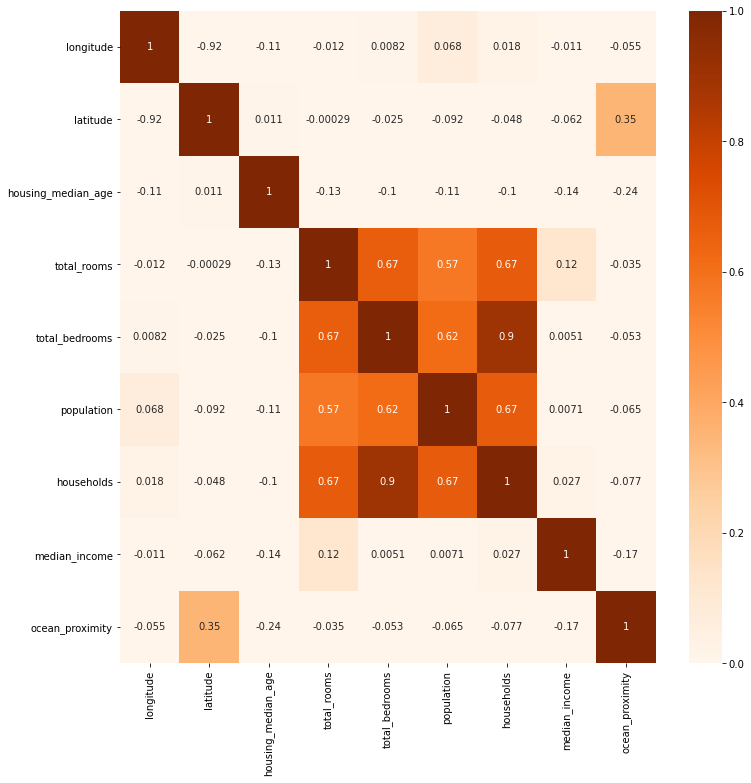

In [24]:
#Use pairplot and heatmap to check for linear relationship
#A. First heatmap
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(X.corr(), cmap="Oranges", annot = True, vmin=0, vmax=1, ax=ax);

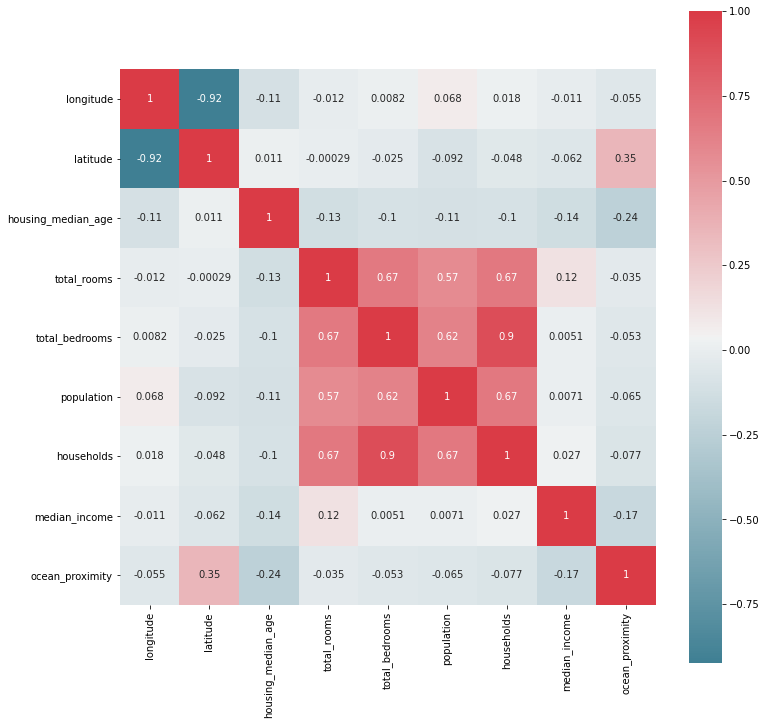

In [25]:
#A more better way to view the heatmap
fig, axe = plt.subplots(figsize=(12,12))
#Get the color palettes 
cmap = sns.diverging_palette(220,10,center = "light", as_cmap=True)
#draw the heatmap
sns.heatmap(X.corr(),vmax=1,square =True, cmap=cmap,annot=True );

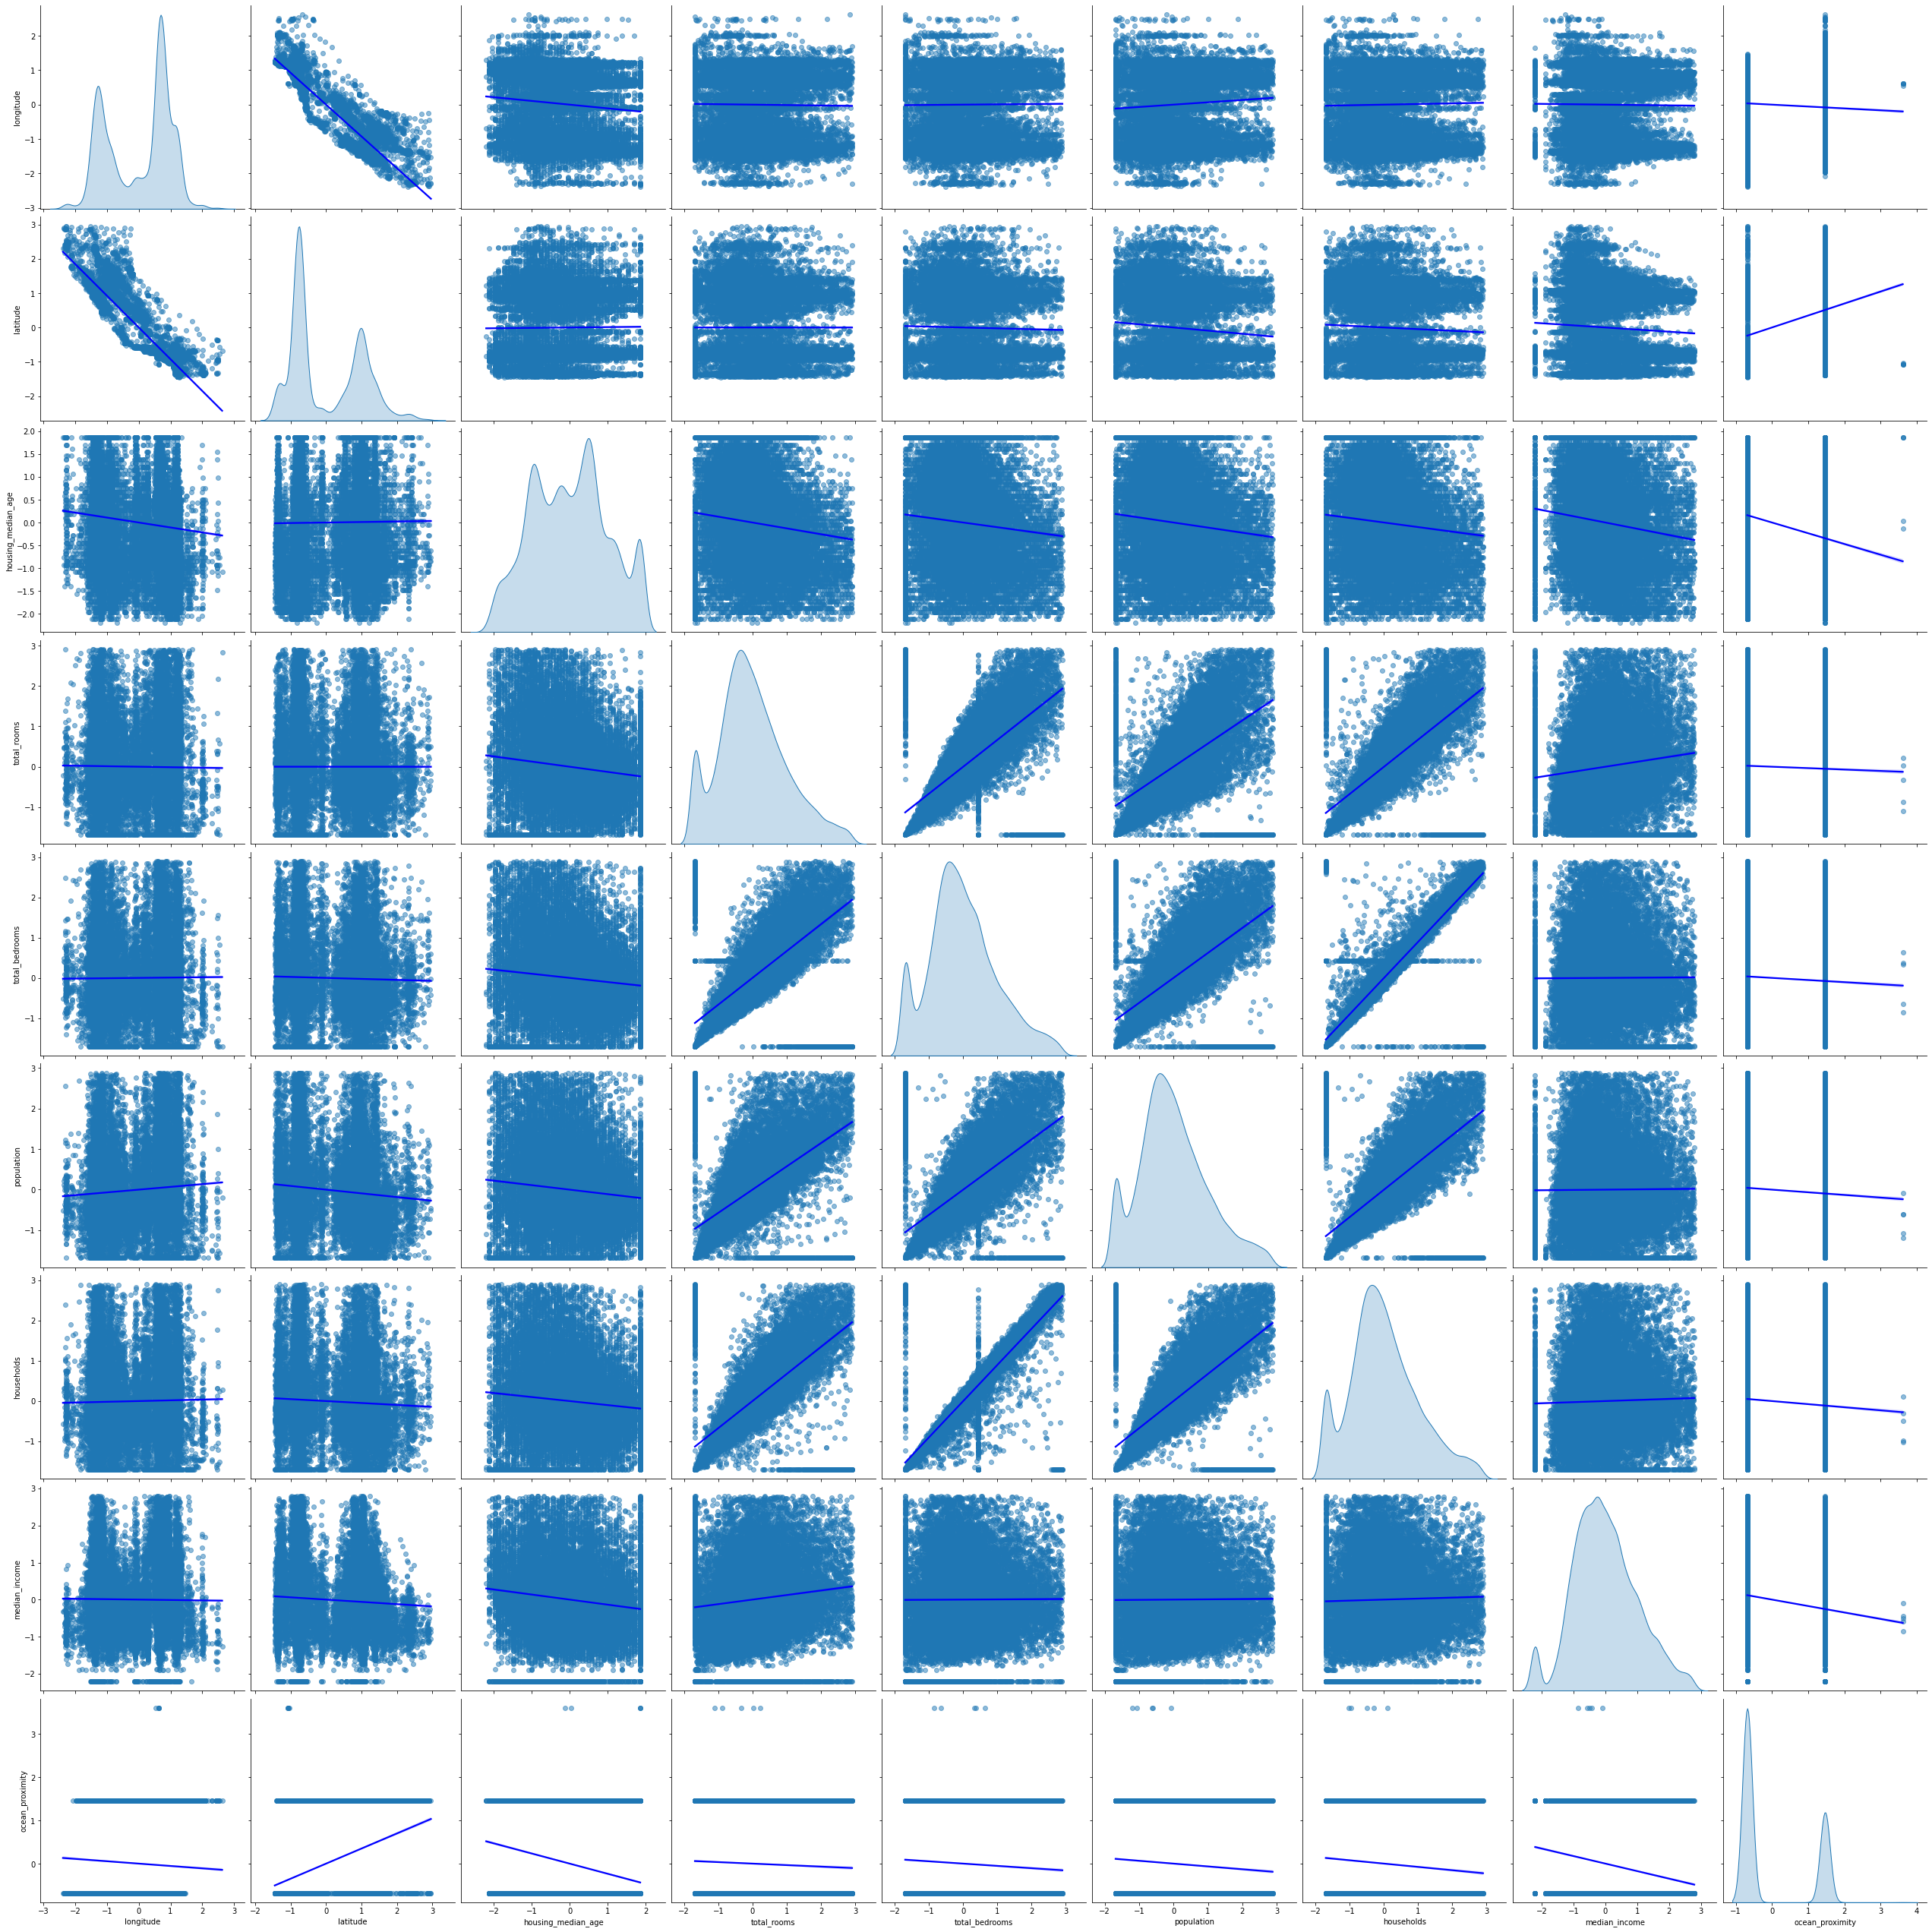

In [26]:
#Note the diagonal parts are just like map of x on x and should be strictly one
#Darker areas above shows stronger correlation
'''
We can use pairplot as well to demonstrate this
I personally prefer the heatmap as it clearly shows the numbers
However, to check for linearity, we have to plot it and visualize
'''
sns.pairplot(df_scaled_housing_data[features],kind='reg',height= 4,
             plot_kws={'line_kws':{'color':'blue'}, 'scatter_kws': {'alpha': 0.5}}, diag_kind = 'kde')
plt.show()

<Figure size 432x288 with 0 Axes>

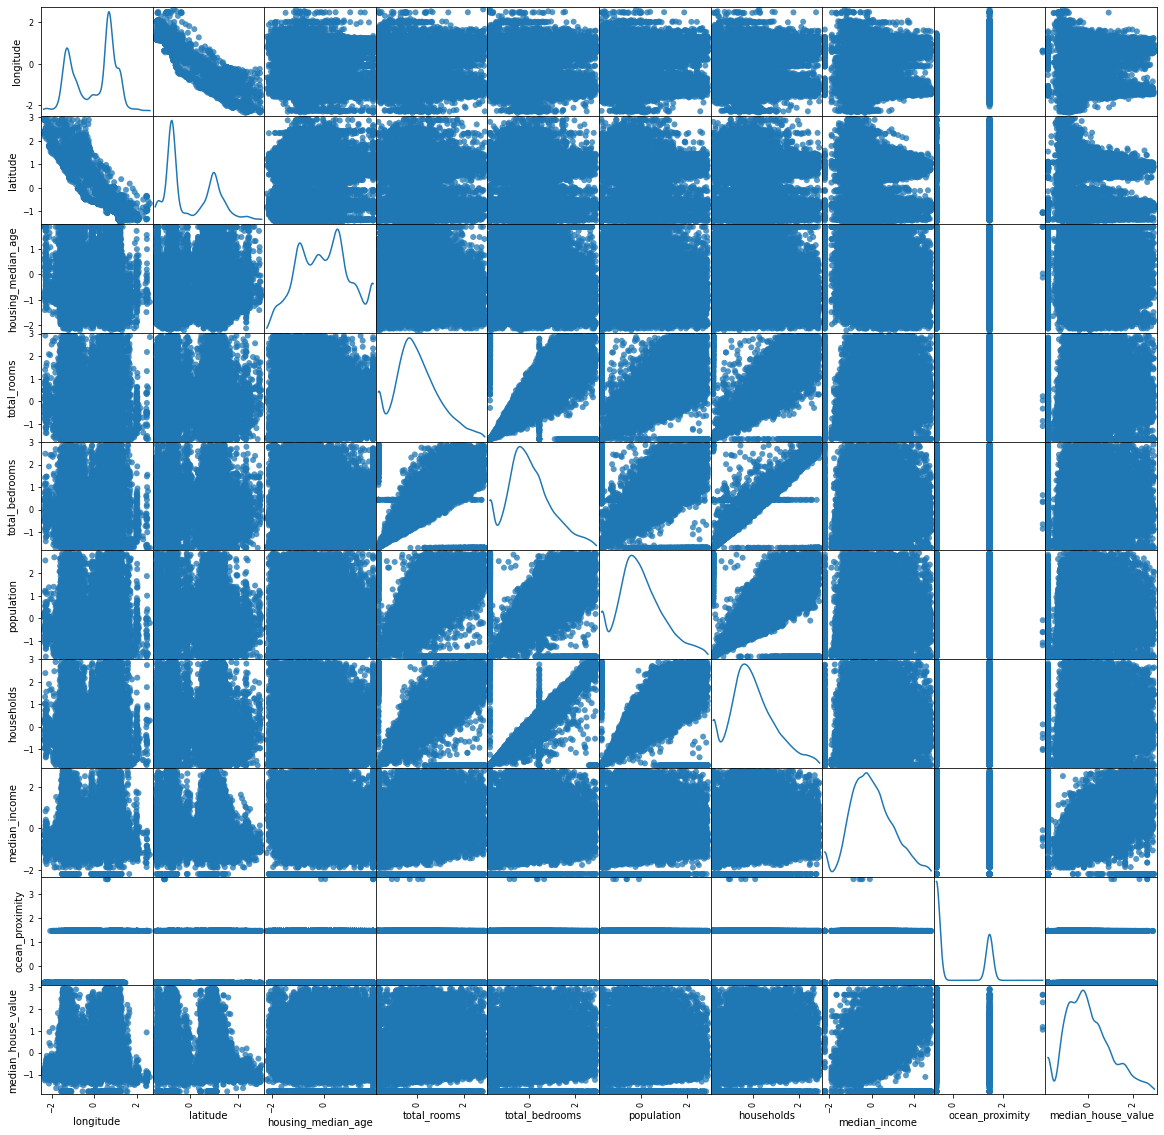

In [27]:
# We can also use scatter plot
fig = plt.figure()
scatter_matrix(df_scaled_housing_data,figsize =(20,20),alpha=0.75,diagonal="kde",marker="o");

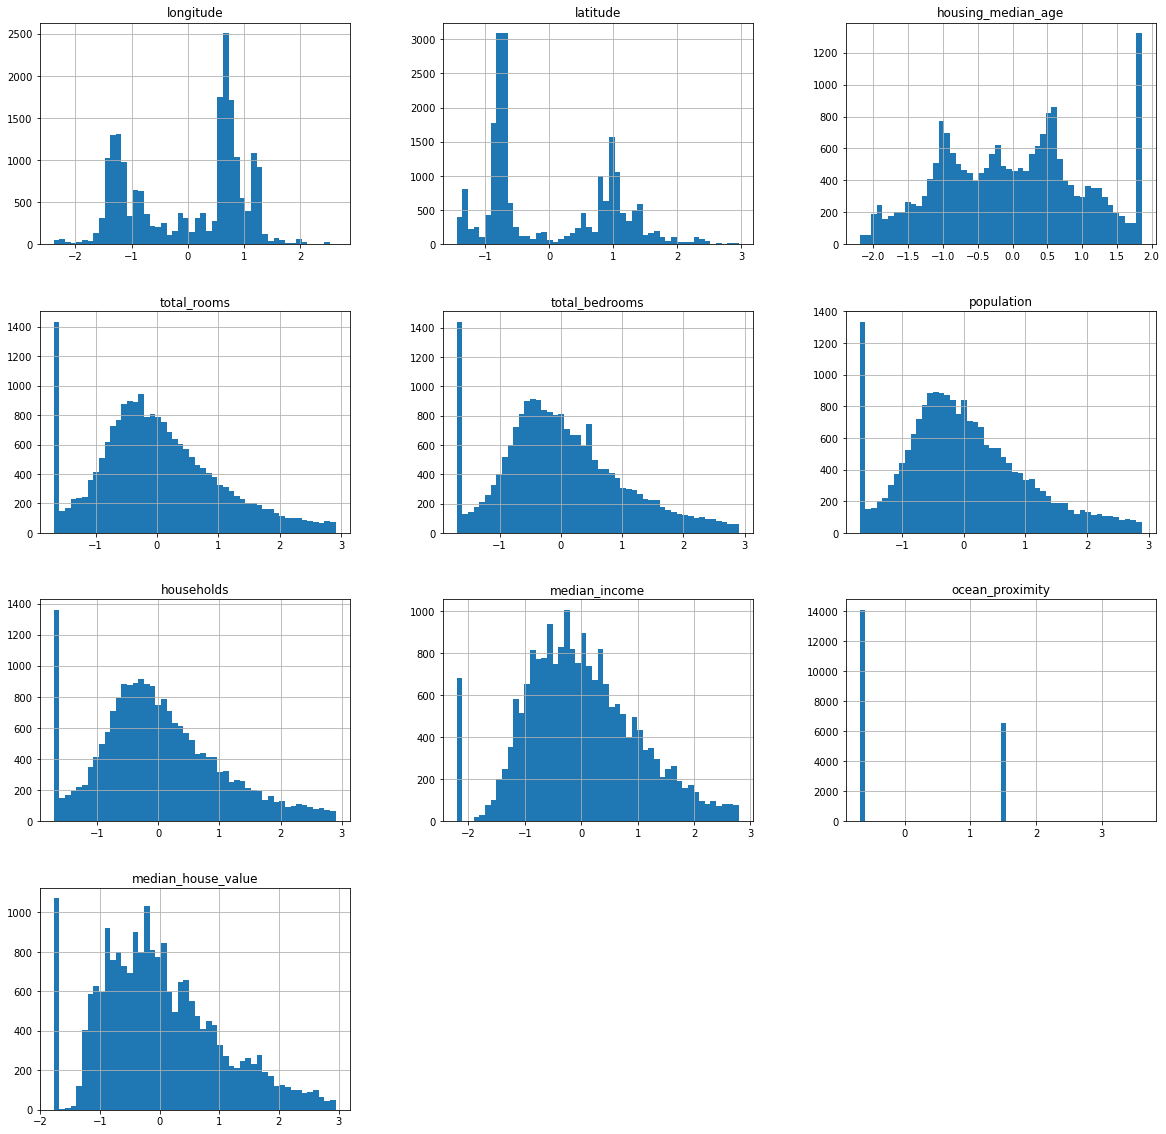

In [28]:
#Also, we can use histogram to check the nature of the distribution
df_scaled_housing_data.hist(figsize=(20,20),bins=50);

### Obtain the skweness: 
* As a general rule of thumb: If skewness is less than -1 or greater than 1, the distribution is highly skewed. If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed. If skewness is between -0.5 and 0.5, the distribution is approximately symmetric

In [29]:
skewness=[]
for i in features:
    skewness.append(df_scaled_housing_data[i].skew())
pd.DataFrame(data=skewness,index=features,columns=['skewness']).sort_values(by='skewness',ascending=False)

skewness
ocean_proximity     0.789454
population          0.515449
households          0.491541
total_rooms         0.487244
total_bedrooms      0.478082
latitude            0.465953
median_income       0.274186
housing_median_age  0.060331
longitude          -0.297801

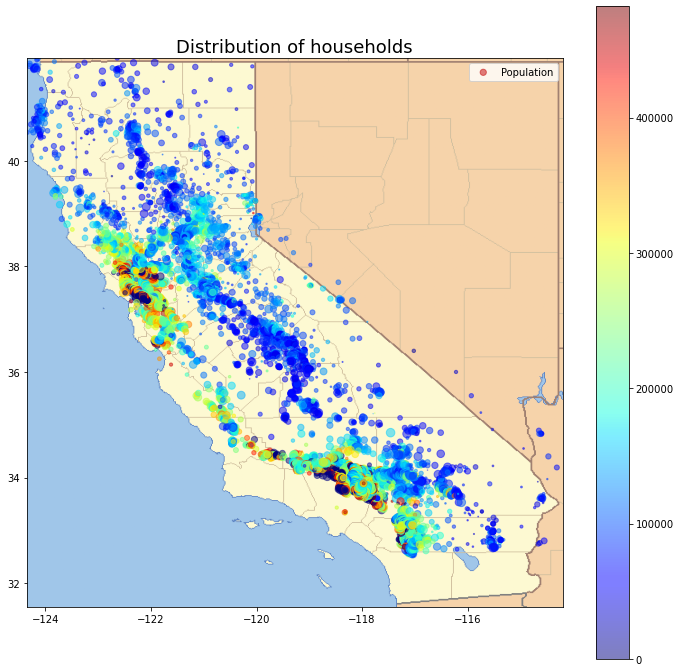

In [30]:
plt.figure(figsize=(12,12))
img=plt.imread('californiaMap.png')
plt.imshow(img,zorder=0,extent=[-124.35,-114.2,31.54,41.95])
data = cali_housing_data
plt.scatter(x=data['longitude'],y=data['latitude'],alpha=0.5,
            s=data['population']/40,c=data['median_house_value'],
            cmap=plt.get_cmap("jet"),zorder=1,label='Population')
plt.colorbar()
plt.title("Distribution of households",size=18)
plt.legend()

## We can confirm from above the following:

* Price of houses are highly related (correlated) to location and population density
* Housing prices near the ocean are higher, except for northern California
### Using Pearson's correlation coefficient for the median house value, we can explore the correlation with other features

In [31]:
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.465964
total_rooms           0.100082
households            0.080349
total_bedrooms        0.063777
population            0.033920
housing_median_age    0.013725
longitude            -0.035878
latitude             -0.114550
ocean_proximity      -0.388532
Name: median_house_value, dtype: float64

# Split the dataset into training and testing: 70/30

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size = 0.70,test_size = 0.30,random_state=42)

In [33]:
#Check to make sure it is split correctly
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14447, 9)
(6192, 9)
(14447, 1)
(6192, 1)


In [34]:
linreg = LinearRegression()
linreg.fit(X_train,y_train) # Training data

LinearRegression()

In [35]:
#Before predicting outcome for the test data, let us check some essential statistics for the trained data
print('The coefficient of the trained data is ',linreg.coef_)
print('The intercept of the trained data is   ',linreg.intercept_)

The coefficient of the trained data is  [[-0.4333182  -0.42799723 -0.02123493  0.01585957  0.04309822 -0.03591262
   0.01705821  0.40020676 -0.19046632]]
The intercept of the trained data is    [-0.00474283]


# Predict output for test dataset using the fitted model

In [36]:
predict_test_data = linreg.predict(X_test)

In [37]:
print(predict_test_data)

[[-0.95184939]
 [-0.44085376]
 [ 0.33094358]
 ...
 [ 0.1060266 ]
 [-0.36068459]
 [ 0.03222449]]


In [38]:
# Error metrics for test data
MSE_test = mean_squared_error(y_test,predict_test_data)
MAE_test = mean_absolute_error(y_test,predict_test_data)
MAPE_test = mean_absolute_percentage_error(y_test,predict_test_data)
RMSE_test = sqrt(MSE_test)
R2 = r2_score(y_test, predict_test_data,multioutput='variance_weighted')

In [39]:
#Print the output
print('Mean square error is ', MSE_test,'\n' 'Mean absolute error is ', 
      MAE_test, '\n' 'Root mean square error is ', RMSE_test, '\n', 'R-square value is ',R2,
     '\n', 'Mean absolute percentage error is', MAPE_test,'%')

Mean square error is  0.6711021476179663 
Mean absolute error is  0.5537674048055683 
Root mean square error is  0.8192082443542461 
 R-square value is  0.3292404766866335 
 Mean absolute percentage error is 2.0565179829859317 %


### Hypothesis Analysis

In [40]:
lm=smf.ols(formula='median_house_value ~ longitude+latitude+housing_median_age+total_rooms+total_bedrooms+population+households+median_income+ocean_proximity',data=df_scaled_housing_data).fit()

In [41]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     1128.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:17:24   Log-Likelihood:                -25158.
No. Observations:               20640   AIC:                         5.034e+04
Df Residuals:                   20630   BIC:                         5.042e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -4.25e-17      0.006  -7.46e-15      1.000      -0.011       0.011
longitude             -0.4348      0.023    -18.887      0.000      -0.480      -0.390
latitude              -0.4250      0.024    -17.361      0.000      -0.473      -0.377
housing_median_age    -0.0170      0.006     -2.776      0.006      -0.029      -0.005
total_rooms            0.0245      0.008      2.999      0.003       0.008       0.041
total_bedrooms         0.0278      0.013      2.096      0.036       0.002       0.054
population            -0.0433      0.008     -5.439      0.000      -0.059      -0.028
households             0.0281      0.014      2.006      0.045       0.001       0.056
median_income          0.3948      0.006     65.719      0.000       0.383       0.407
ocean_proximity       -0.1974      0.009    -21.215      0.000      -0.216      -0.179
==============================================================================
Omnibus:                     1814.745   Durbin-Watson:                   1.174
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10984.319
Skew:                           0.179   Prob(JB):                         0.00
Kurtosis:                       6.556   Cond. No.                         10.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Isolate the median_income and median_house_value, and perform linear regression analysis on them

In [42]:
X1 = df_scaled_housing_data[['median_income']]
y1 = df_scaled_housing_data[['median_house_value']]


In [43]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,y1,train_size = 0.8,test_size = 0.2,random_state=42)

In [44]:
#Check to make sure it is split correctly
print(X_train1.shape)
print(X_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(16512, 1)
(4128, 1)
(16512, 1)
(4128, 1)


In [45]:
linreg_1 = LinearRegression()
linreg_1.fit(X_train1,y_train1) # Training data

LinearRegression()

In [46]:
print('The coefficient of the trained data is ',linreg_1.coef_)
print('The intercept of the trained data is   ',linreg_1.intercept_)

The coefficient of the trained data is  [[0.46641283]]
The intercept of the trained data is    [-0.00335446]


In [47]:
# Predict some output
predict_test_data1 = linreg_1.predict(X_test1)

In [48]:
# Print the predicted data
print(predict_test_data1)

[[-0.54326379]
 [-0.29589374]
 [-0.01980305]
 ...
 [-1.03247507]
 [-0.22206975]
 [ 0.00114818]]


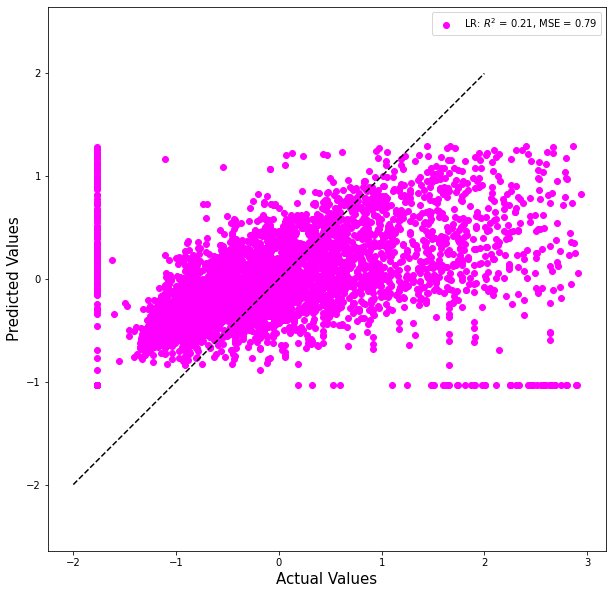

In [49]:
# Plot the fitted and predicted for training and test dataset
plt.figure(figsize=(10,10))

r2_1 = r2_score(y_test1, predict_test_data1,multioutput='variance_weighted')
mse_1 = mean_squared_error(y_test1, predict_test_data1)
label_lr = "LR: $R^2$ = %.2f, MSE = %.2f" % (r2_1, mse_1)
plt.plot(y_test1, predict_test_data1, 'o',color='magenta', label=label_lr);
plt.legend()
plt.xlim([int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())])
plt.ylim([int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())])
plt.plot([int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())],
         [int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())],'k--');
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

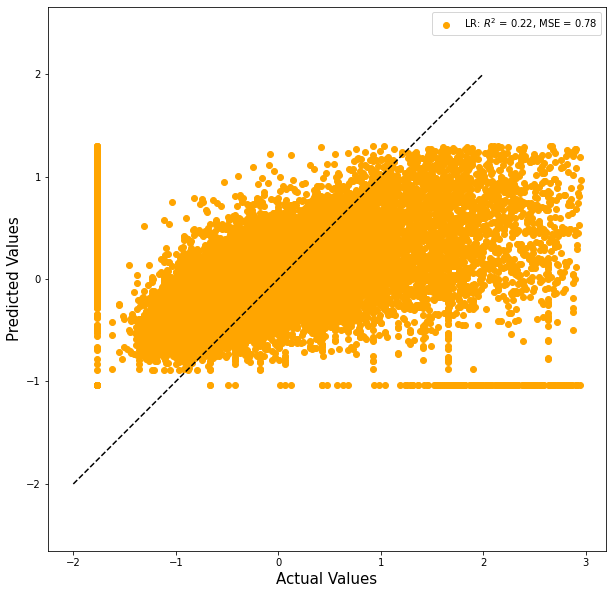

In [50]:
#Plot the trained data
predict_train_data1 = linreg_1.predict(X_train1)
plt.figure(figsize=(10,10))

r2_1 = r2_score(y_train1, predict_train_data1,multioutput='variance_weighted')
mse_1 = mean_squared_error(y_train1, predict_train_data1)
label_lr = "LR: $R^2$ = %.2f, MSE = %.2f" % (r2_1, mse_1)
plt.plot(y_train1, predict_train_data1, 'o',color='orange', label=label_lr);
plt.legend()
plt.xlim([int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())])
plt.ylim([int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())])
plt.plot([int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())],
         [int(X_test1['median_income'].min()), int(y_test1['median_house_value'].max())],'k--');
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.axis('equal')
plt.show()

In [51]:
lm_1=smf.ols(formula='median_house_value ~ median_income',data=df_scaled_housing_data).fit()

In [52]:
lm_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     median_house_value   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     5724.
Date:                Tue, 26 Oct 2021   Prob (F-statistic):               0.00
Time:                        13:17:25   Log-Likelihood:                -26761.
No. Observations:               20640   AIC:                         5.353e+04
Df Residuals:                   20638   BIC:                         5.354e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.097e-16      0.006   1.78e-14      1.000      -0.012       0.012
median_income     0.4660      0.006     75.655      0.000       0.454       0.478
==============================================================================
Omnibus:                     2144.019   Durbin-Watson:                   1.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6564.140
Skew:                           0.549   Prob(JB):                         0.00
Kurtosis:                       5.535   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Insight from the OSL
* The P value is 0.000, indictating strong evidence against the null hypothesis. 
* In this case, we reject the null hypothesis H0 and accept the alternative hypothesis Ha.
* We summarize that there is a strong relationship between median_house_value and median_income

In [53]:
#Check for outliers using the median_house_value 
#Q3 = df_scaled_housing_data.median_house_value.quantile(0.75)
#Q1 = df_scaled_housing_data.median_house_value.quantile(0.25)
#IQR = Q3-Q1
#ur = Q3 + 1.5*IQR
#lr = Q1 - 1.5*IQR
#print('Upper range is ', ur)
#print('Lower range is ', lr)
#outliers = df_scaled_housing_data[(df_scaled_housing_data.median_house_value > ur) | 
#                                  (df_scaled_housing_data.median_house_value<lr)]
#outliers